In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# load exact data
exact = "exact.dat"     
exact_data = np.loadtxt(exact)
Ls, exact_data = exact_data[:,0], exact_data[:, 1]

pmm_predictions_wide = "pmm_predictions_wide.dat"
pmm_predictions_medium = "pmm_predictions_medium.dat"
pmm_predictions_narrow = "pmm_predictions_narrow.dat"

wide_data = np.loadtxt(pmm_predictions_wide)[:,1]
medium_data = np.loadtxt(pmm_predictions_medium)[:,1]
narrow_data = np.loadtxt(pmm_predictions_narrow)[:,1]

In [50]:
training_ranges = {
    "wide" : (5.0, 15.0),
    "medium" : (5.0, 10.0),
    "narrow" : (5.0, 7.0)
}
predictions = {
    "wide" : wide_data,
    "medium" : medium_data,
    "narrow" : narrow_data
}
alphas = {
    "wide" : 0.1,
    "medium" : 0.2,
    "narrow" : 0.3
}

colors = {"narrow":"tab:blue", "medium":"tab:orange", "wide":"tab:green"}

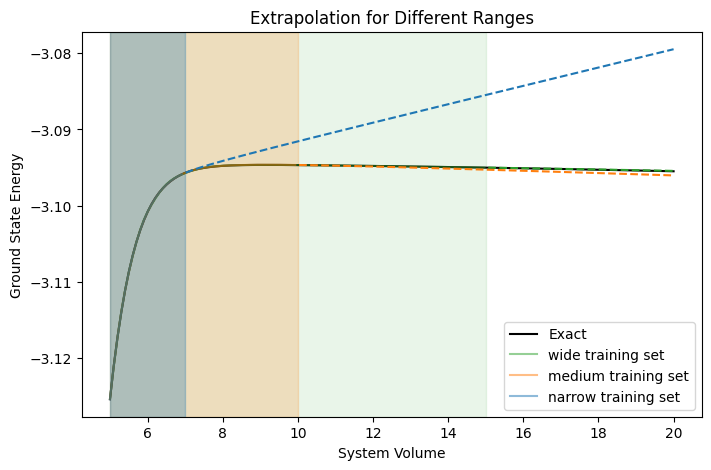

In [52]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(Ls, exact_data, 'k', lw=1.5, alpha=1.0, label="Exact")

for key in ["wide", "medium", "narrow"]:
    y_pred = predictions[key]
    a, b = training_ranges[key]

    # shade training region
    ax.axvspan(a, b, color=colors[key], alpha=alphas[key])

    # plot predicted curve
    # use solid inside training range, dashed outside
    inside = (Ls >= a) & (Ls <= b)
    ax.plot(Ls[inside], y_pred[inside], color=colors[key], lw=1.5, ls="-", label=f"{key} training set", alpha=0.5)
    ax.plot(Ls[~inside], y_pred[~inside], color=colors[key], lw=1.5, ls="--", alpha=1)
    
ax.set_xlabel("System Volume")
ax.set_ylabel("Ground State Energy")
ax.set_title("Extrapolation for Different Ranges")
plt.legend()
plt.savefig("extrapolation_ranges.png")
plt.show()